In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import os
import cv2
import random
import pickle

In [4]:
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [9]:
# General directory
DATADIR = "c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/"

# Categories for neural network to detect
CATEGORIES = ['cardboard', 'glass', 'metal',
              'paper', 'plastic', 'trash']

cardboard_dir = 'c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/cardboard'
glass_dir = 'c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/glass'
metal_dir = 'c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/metal'
paper_dir = 'c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/paper'
plastic_dir = 'c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/plastic'
trash_dir = 'c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data/trash'

In [10]:
# Function to assign labels to images
def assign_label(img, debris_type):
    return debris_type

In [11]:
# Function to be used to create training data for each image directory
train_images = []
train_labels = []

img_size = 75

def make_train_data(debris_type, DATADIR):
    for img in os.listdir(DATADIR):
        label = assign_label(img, debris_type)
        path = os.path.join(DATADIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size, img_size))

        train_images.append(np.array(img))
        train_labels.append(str(label))

In [12]:
# Cardboard training data
make_train_data('cardboard', cardboard_dir)
print(len(train_images))

402


In [13]:
make_train_data('glass', glass_dir)
print(len(train_images))

903


In [14]:
make_train_data('metal', metal_dir)
print(len(train_images))

1313


In [15]:
make_train_data('paper', paper_dir)
print(len(train_images))

1907


In [16]:
make_train_data('plastic', plastic_dir)
print(len(train_images))

2389


In [17]:
make_train_data('trash', trash_dir)
print(len(train_images))

2526


In [18]:
# Verifying shape of X array
train = np.array(train_images)
train = train/255.0
train.shape

(2526, 75, 75, 3)

In [19]:
train[0, :, :]

array([[[0.66666667, 0.80392157, 0.96078431],
        [0.65882353, 0.79607843, 0.95294118],
        [0.66666667, 0.78431373, 0.94509804],
        ...,
        [0.49019608, 0.60392157, 0.77647059],
        [0.58823529, 0.70196078, 0.8745098 ],
        [0.56470588, 0.67843137, 0.85098039]],

       [[0.65882353, 0.79607843, 0.95294118],
        [0.65882353, 0.79607843, 0.95294118],
        [0.66666667, 0.78431373, 0.94509804],
        ...,
        [0.48627451, 0.6       , 0.77254902],
        [0.56078431, 0.67843137, 0.84705882],
        [0.57254902, 0.68627451, 0.85882353]],

       [[0.6627451 , 0.8       , 0.95686275],
        [0.6627451 , 0.8       , 0.95686275],
        [0.67843137, 0.79607843, 0.95686275],
        ...,
        [0.50588235, 0.61960784, 0.79215686],
        [0.55294118, 0.67058824, 0.83921569],
        [0.54509804, 0.65882353, 0.83137255]],

       ...,

       [[0.43137255, 0.53333333, 0.69019608],
        [0.45490196, 0.55686275, 0.69019608],
        [0.43529412, 0

In [20]:
# Extract the labels
label_dummies = pd.get_dummies(train_labels)
labels = label_dummies.values.argmax(1)
labels

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [21]:
pd.unique(train_labels)

array(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
      dtype=object)

In [22]:
pd.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int64)

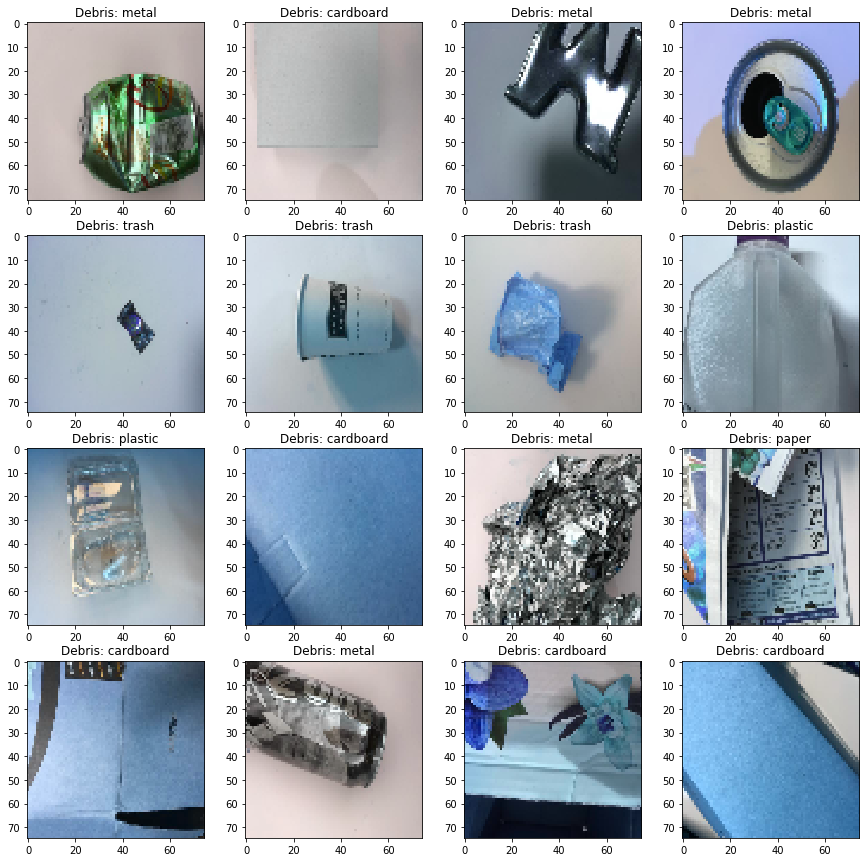

In [23]:
# Visualize random images
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(15,15)

for j in range(4):
    for k in range(4):
        image = np.random.randint(0, len(train_labels))
        ax[j, k].imshow(train[image])
        ax[j, k].set_title('Debris: ' + train_labels[image])
        
plt.show(image)

In [24]:
# Encoding the Y array
# from keras.utils import to_categorical

# labelEncoder = LabelEncoder()
# y = labelEncoder.fit_transform(Z)
# y = to_categorical(y, 6)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.20, random_state=42)

In [26]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2020, 75, 75, 3)
y_train shape:  (2020,)
X_test shape:  (506, 75, 75, 3)
y_test shape:  (506,)


In [27]:
y_train[:]

array([0, 4, 4, ..., 2, 2, 1], dtype=int64)

In [28]:
# Shuffle the labels and images randomly for better results
# union_list = list(zip(train, labels))
union_list = list(zip(X_train, y_train))
random.shuffle(union_list)
train, labels = zip(*union_list)

# Convert the shuffled list to numpy array type
# train = np.array(train)
# labels = np.array(labels)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [29]:
# Keras Dependencies
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten

In [30]:
# Building the model
model = Sequential()

# 3 convolutional layers
model.add(Conv2D(32, (6, 6), input_shape = (img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(96, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

# Output layer with 6 neurons for 6 classes
model.add(Dense(6, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
# Compiling for the model for integer targets
model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        3488      
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 96)        5

In [37]:
# Fit (Train) the model -- 25 iterations
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50)

Train on 2020 samples, validate on 506 samples
Epoch 1/50
2020/2020 [==============================] - 1s 468us/sample - loss: 0.2049 - acc: 0.9401 - val_loss: 2.2741 - val_acc: 0.5613
Epoch 2/50
2020/2020 [==============================] - 1s 395us/sample - loss: 0.1911 - acc: 0.9386 - val_loss: 1.8589 - val_acc: 0.6443
Epoch 3/50
2020/2020 [==============================] - 1s 401us/sample - loss: 0.0973 - acc: 0.9693 - val_loss: 2.0174 - val_acc: 0.6304
Epoch 4/50
2020/2020 [==============================] - 1s 395us/sample - loss: 0.0780 - acc: 0.9733 - val_loss: 2.4044 - val_acc: 0.6265
Epoch 5/50
2020/2020 [==============================] - 1s 394us/sample - loss: 0.0698 - acc: 0.9772 - val_loss: 2.4872 - val_acc: 0.6245
Epoch 6/50
2020/2020 [==============================] - 1s 396us/sample - loss: 0.1602 - acc: 0.9460 - val_loss: 2.0149 - val_acc: 0.6265
Epoch 7/50
2020/2020 [==============================] - 1s 394us/sample - loss: 0.1287 - acc: 0.9559 - val_loss: 2.1275 - val

In [38]:
# Save the model
model.save("debrisTrainer.h5")

In [39]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("debrisTrainer.h5")

In [40]:
# Evaluating the model using the training data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

506/506 - 0s - loss: 2.7718 - acc: 0.6225
Loss: 2.7717872825064678, Accuracy: 0.6225296258926392


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Error Analysis
y_train_pred = cross_val_predict
conf_mx = confusion_matrix()

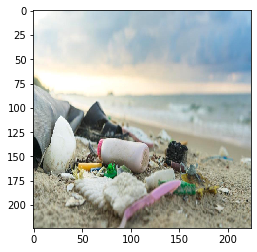

In [114]:
from tensorflow.keras.preprocessing import image

# Importing image for testing
PATH = "C:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification"
path = os.path.join(PATH, "sample_images", "beach1.jpg")
img = image.load_img(path, target_size=image_size)
# img = cv2.resize(img, (img_size, img_size))
plt.imshow(img)

In [109]:
from tensorflow.keras.applications.xception import preprocess_input,

# Preprocess image for model prediction
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [110]:
from tensorflow.keras.applications.xception import decode_predictions

# Predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

ValueError: Error when checking input: expected conv2d_27_input to have shape (75, 75, 3) but got array with shape (224, 224, 3)